# Practice: image denoising

In [1]:
from tensorly.decomposition import parafac
import tensorly as tl
import numpy as np

X = tl.tensor(np.arange(24).reshape((3, 4, 2)))

In [2]:
from tensorly.decomposition import tucker, partial_tucker

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline 

from skimage.transform import resize
from skimage.data import astronaut, chelsea
from matplotlib.pyplot import imread

image2 = np.array(astronaut(), dtype=np.float64)


In [4]:
def to_image(tensor):
    tensor -= tensor.min()
    tensor /= tensor.max()
    tensor *= 255
    return tensor.astype(np.uint8)

def show_im(img, title):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.imshow(to_image(img))
    ax.set_axis_off()
    plt.title(title)

# denoising

Our task is to restore image after adding random noise to it. 

We have an image of austrinaut:



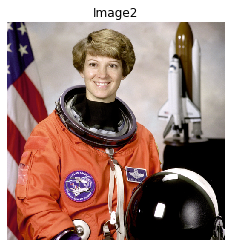

In [5]:
show_im(image2, "Image2")

Add random noise to it:

In [188]:
mean = 0
var = 5000
sigma = var ** 0.5
gaussian = np.random.normal(mean, sigma, tensor.shape) #  np.zeros((224, 224), np.float32)

In [189]:
gaussian = np.random.normal(mean, sigma, tensor.shape) #  np.zeros((224, 224), np.float32)
currupted_im = gaussian + tensor

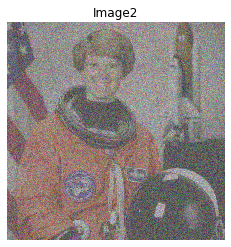

In [190]:
show_im(currupted_im[0], "Image2")

Try CP, Tucker, TT decomposition in Tensorly to decompose and reconstruct 3-dimentional tensor. Try different values of core shape to archieve the best performance of the denoising.

Compare results for different decomposition and ranks and select the one which gives the best results. Please show and compare images, recieved by different decomposition techtiques. You can also count the distance between reconstructed and original images (i.e. Frobenius norm of difference).

In [191]:
core, factors = partial_tucker(currupted_im, ranks=[60, 60, 3], modes=[1, 2, 3])

In [192]:
recim.shape

(512, 512, 3)

In [193]:
for elem in factors:
    print (elem.shape)

(512, 60)
(512, 60)
(3, 3)


In [194]:
core1 = tl.tenalg.multi_mode_dot(currupted_im[0], factors, transpose=True)
recim = tl.tucker_to_tensor((core1, factors))

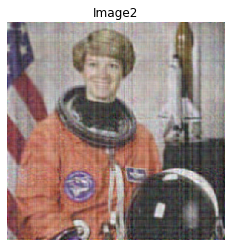

In [195]:
show_im(recim, "Image2")

In [196]:
core, factors = partial_tucker(currupted_im, ranks=[15, 70, 70], modes=[0, 1, 2])

In [197]:
print (factors[0].shape, factors[1].shape, factors[2].shape)

(26, 15) (512, 70) (512, 70)


In [198]:
image2.shape

(512, 512, 3)

In [199]:
currupted_im[:,:,:,0].shape

(26, 512, 512)

In [200]:
core_red = tl.tenalg.multi_mode_dot(currupted_im[:,:,:,0], factors, transpose=True)
rec_red = tl.tucker_to_tensor((core_red, factors))
core_green = tl.tenalg.multi_mode_dot(currupted_im[:,:,:,1], factors, transpose=True)
rec_green = tl.tucker_to_tensor((core_green, factors))
core_blue = tl.tenalg.multi_mode_dot(currupted_im[:,:,:,2], factors, transpose=True)
rec_blue = tl.tucker_to_tensor((core_blue, factors))


In [201]:
rec_blue.shape

(26, 512, 512)

In [210]:
tensor = tl.concatenate([rec_red[:,:,:,None], rec_green[:,:,:,None], rec_blue[:,:,:,None]], axis=3)
tensor.shape

(26, 512, 512, 3)

In [211]:
currupted_im[0].shape

(512, 512, 3)

In [212]:
core, factors = partial_tucker(tensor, ranks=[150, 150, 3], modes=[1, 2, 3])


In [213]:
core_n = tl.tenalg.multi_mode_dot(recim, factors, transpose=True)
rec_n = tl.tucker_to_tensor((core_n, factors))

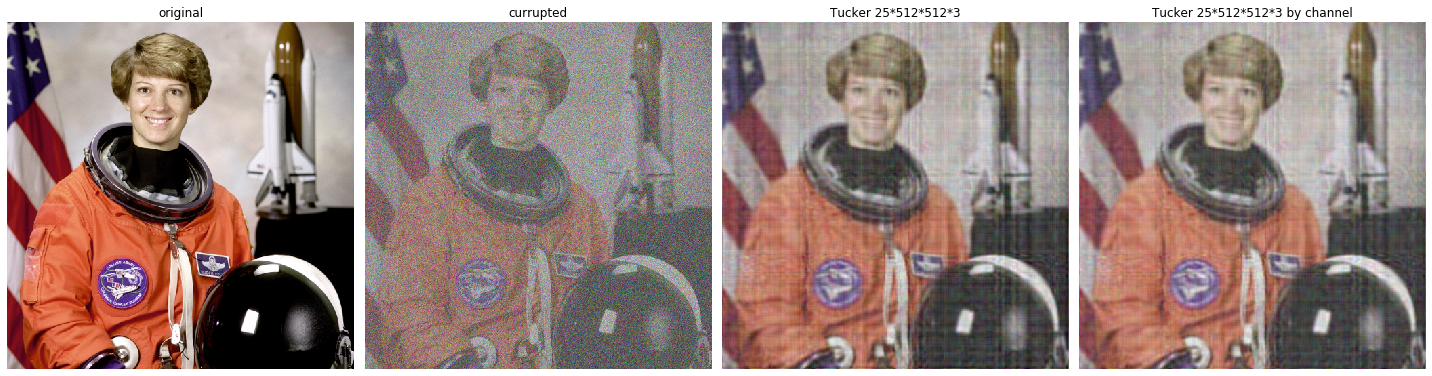

In [214]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 4, 1)
ax.set_axis_off()
ax.imshow(to_image(image2))
ax.set_title('original')

ax = fig.add_subplot(1, 4, 2)
ax.set_axis_off()
ax.imshow(to_image(currupted_im[0]))
ax.set_title('currupted')

ax = fig.add_subplot(1, 4, 3)
ax.set_axis_off()
ax.imshow(to_image(recim))
ax.set_title('Tucker 25*512*512*3')

ax = fig.add_subplot(1, 4, 4)
ax.set_axis_off()
ax.imshow(to_image(rec_n))
ax.set_title('Tucker 25*512*512*3 by channel')

plt.tight_layout()
plt.show()